# Sentimental Analysis 

#### Sentiment Analysis uses natural language processing and machine learning techniques to analyze the emotional tone or sentiment behind a piece of text. It involves identifying and categorizing opinions expressed in a text as positive, negative, or neutral.

![picture](https://drive.google.com/uc?export=view&id=1VJvxnLRYSwKBAIZGA9kdk-3Ys-9ELu-J)

### Importing the essential libraries 

In [1]:
# Importing the libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import nltk

### Exploring the dataset 

In [2]:
# Import the dataset
df = pd.read_csv(r"C:\Users\bobby\Desktop\Technohacks Data Science Internship\Datasets\Tweets.csv")
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [3]:
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [4]:
df.shape

(14640, 15)

In [5]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

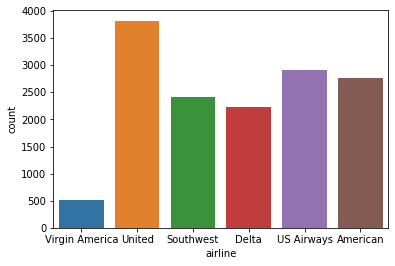

In [6]:
sns.countplot(data=df,x="airline")
plt.show()

### Data cleaning

In [7]:
df.drop(['tweet_id', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'], axis=1,inplace=True)

In [8]:
df.isnull().sum()

airline_sentiment    0
text                 0
dtype: int64

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.dropna(inplace=True)

In [11]:
df.shape

(14452, 2)

In [12]:
df

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
...,...,...
14635,positive,@AmericanAir thank you we got on a different f...
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,@AmericanAir Please bring American Airlines to...
14638,negative,"@AmericanAir you have my money, you change my ..."


In [13]:
#percentage
df["airline_sentiment"].value_counts()/len(df["airline_sentiment"])

negative    0.628771
neutral     0.212220
positive    0.159009
Name: airline_sentiment, dtype: float64

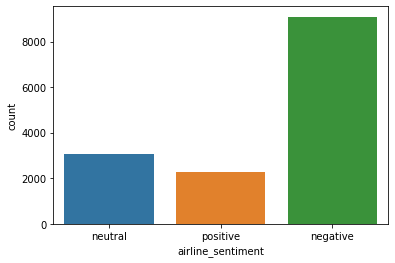

In [14]:
sns.countplot(data=df, x="airline_sentiment")
plt.show()

In [15]:
#maximum length of a tweet in a text
maxi_length=df.text.apply(len)
maxi_length.max()

186

In [16]:
# minimum length of a tweet in a text
mini_length=df.text.str.len()
mini_length.min()

12

In [17]:
pd.DataFrame(df.text.apply(len).describe())

,text
count,14452.000000
mean,104.118738
std,35.991567
min,12.000000
25%,77.000000
50%,115.000000
75%,136.000000
max,186.000000


### Data Preprocessing 

In [18]:
# Data Preprocessing
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import pandas as pd

# Create a stemmer instance
stemmer = PorterStemmer()

# Modify the preprocess_text function to include stemming
def preprocess_text(text):
    # Remove special characters, URLs, and user mentions
    text = ' '.join(word for word in word_tokenize(text) if not word.startswith('@') and word.isalnum())
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    text = ' '.join(word for word in words if word not in stop_words)
    # Apply stemming to each word
    words = word_tokenize(text)
    text = ' '.join(stemmer.stem(word) for word in words)
    return text

# Assuming 'df' is your DataFrame with a 'text' column
df['text'] = df['text'].apply(preprocess_text)

In [19]:
df

,airline_sentiment,text
0,neutral,virginamerica dhepburn said
1,positive,virginamerica plu ad commerci experi tacki
2,neutral,virginamerica today must mean need take anoth ...
3,negative,virginamerica realli aggress blast obnoxi ente...
4,negative,virginamerica realli big bad thing
...,...,...
14635,positive,americanair thank got differ flight chicago
14636,negative,americanair leav 20 minut late flight warn com...
14637,neutral,americanair pleas bring american airlin blackb...
14638,negative,americanair money chang flight answer phone su...


In [20]:
df["airline_sentiment"].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [21]:
mapping = {"negative": 0, 'neutral': 1, "positive": 2}
df["airline_sentiment"] = df["airline_sentiment"].map(mapping)

In [22]:
df.head(3)

,airline_sentiment,text
0,1,virginamerica dhepburn said
1,2,virginamerica plu ad commerci experi tacki
2,1,virginamerica today must mean need take anoth ...


In [23]:
X=df["text"]
y=df["airline_sentiment"]

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [25]:
count_vectorizer = CountVectorizer()
X_counts = count_vectorizer.fit_transform(X)
feature_names = count_vectorizer.get_feature_names_out()

In [26]:
X=pd.DataFrame(X_counts.toarray())

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=50)

In [28]:
print(f'shape of X_train {X_train.shape} & shape of y_train {y_train.shape}')
print(f'shape of X_test {X_test.shape} & shape of y_test {y_test.shape}')

shape of X_train (10116, 10637) & shape of y_train (10116,)
shape of X_test (4336, 10637) & shape of y_test (4336,)


In [29]:
bayes = MultinomialNB(alpha=0.45833).fit(X_train, y_train)

In [30]:
bayes_pred=bayes.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [32]:
accuracy_score(y_test,bayes_pred)

0.7613007380073801

In [33]:
print(classification_report(y_test, bayes_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      2723
           1       0.60      0.49      0.54       934
           2       0.69      0.61      0.64       679

    accuracy                           0.76      4336
   macro avg       0.70      0.66      0.68      4336
weighted avg       0.75      0.76      0.75      4336



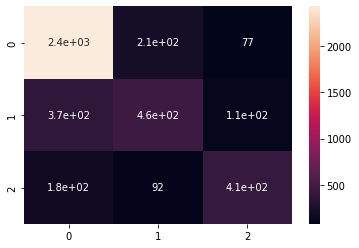

In [34]:
sns.heatmap(confusion_matrix(y_test, bayes_pred),  annot=True)
plt.show()

### LightGBM 

In [36]:
import lightgbm as lgb

In [37]:
light_model = lgb.LGBMClassifier(n_estimators=200, learning_rate=.1,reg_lambda=0,
                                 n_jobs=-1).fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016481 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1906
[LightGBM] [Info] Number of data points in the train set: 10116, number of used features: 727
[LightGBM] [Info] Start training from score -0.463461
[LightGBM] [Info] Start training from score -1.556589
[LightGBM] [Info] Start training from score -1.832310


In [38]:
light_model_predict = light_model.predict(X_test)

In [39]:
accuracy_score(y_test, light_model_predict)

0.7802121771217713

In [40]:
print(classification_report(y_test, light_model_predict))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      2723
           1       0.62      0.54      0.58       934
           2       0.73      0.65      0.68       679

    accuracy                           0.78      4336
   macro avg       0.73      0.69      0.71      4336
weighted avg       0.77      0.78      0.77      4336



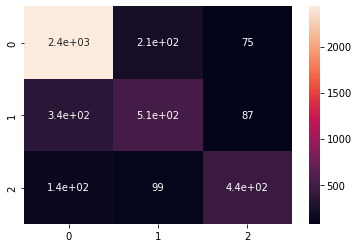

In [41]:
sns.heatmap(confusion_matrix(y_test, light_model_predict), annot=True)
plt.show()